<a href="https://colab.research.google.com/github/AfsanehHabibi/reddit-conversation-quality/blob/main/Conversation_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 774.6 kB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/University/RedditData/"

In [4]:
import pickle

with open(f"{base_path}conversations_with_features_dataframe.pkl", 'rb') as file:
    df = pickle.load(file)

In [5]:
df = df.rename(columns={'politensess': 'politeness'})

#Conversation-addation

In [15]:
df['conv-unweighted'] = df['norm_readability'] + df['norm_politeness'] + df['has_reasoning'] + df['evidence'] + df['relatedness']

In [16]:
df['conv-eq-maxim'] = 0.5*df['norm_readability'] + 0.5*df['norm_politeness'] + 0.5*df['has_reasoning'] + 0.5*df['evidence'] + df['relatedness']

In [17]:
df.head()

,id,conversation_id,reply_to,readability,evidence,has_reasoning,politeness,relatedness,subjectivity,polarity,new_readability,norm_readability,norm_politeness,conv-unweighted,conv-eq-maxim
0,xyt38s,xyt38s,None,-0.5,0.5,0,0.095238,NaN,0.532381,0.224286,-0.5,0.95,0.117647,NaN,NaN
1,iromk5a,xyt38s,xyt38s,-0.5,0.5,0,0.095238,0.887727,0.532381,0.224286,-0.5,0.95,0.117647,2.455374,1.671550
2,irpc624,xyt38s,xyt38s,-4.5,0.5,0,0.000000,0.031587,0.000000,0.000000,-4.5,0.55,0.000000,1.081587,0.556587
3,irp3pvs,xyt38s,xyt38s,-5.5,0.0,0,0.047619,0.000000,0.400000,0.800000,-5.5,0.45,0.058824,0.508824,0.254412
4,xyt38b,xyt38b,None,-2.5,0.5,1,0.380952,NaN,0.415179,0.015476,-2.5,0.75,0.470588,NaN,NaN


#Plots

##Scatter plot

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_for_numeric_to_mean_numeric(df, column1, column2):
    # Create a new DataFrame with the mean politeness of replies for each original row
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_column = replies_df.groupby('reply_to')[column2].mean()

    # Merge the original rows with the mean politeness of replies
    df = df.merge(mean_column.rename('mean_' + column2), left_on='id', right_index=True, how='left')

    # Plot the relationship between the politeness of the original row and the mean politeness of replies
    non_nan_count = df[(df['mean_' + column2].notnull()) & (df[column1].notnull())].shape[0]
    print(f"Number of rows with non-NaN values in both 'mean_{column2}' and '{column1}': {non_nan_count}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column1, y='mean_' + column2, data=df)
    plt.xlabel(f'{column1} of Original Row')
    plt.ylabel(f'Mean {column2} of Replies')
    plt.title(f'Relationship between Original {column1} and Mean {column2} of Replies')
    plt.show()


##Boxplot

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots_for_categorical_to_mean_numeric(df, column1, column2):
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_column = replies_df.groupby('reply_to')[column2].mean()

    # Merge the original rows with the mean of replies
    df = df.merge(mean_column.rename('mean_' + column2), left_on='id', right_index=True, how='left')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column1, y='mean_' + column2, data=df, fliersize=3)
    #showfliers=False, fliers are outliers
    plt.title(f'Boxplot for {column1} in respect to mean replies of {column2}')
    plt.xlabel(column1)
    plt.ylabel('mean ' + column2)
    plt.tight_layout()

    # the number of points in each boxplot
    for i, box in enumerate(df.groupby(column1)['mean_' + column2]):
        print(box[1].shape[0])

    plt.show()

##Density plot

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def density_for_numeric_to_mean_numeric(df, column1, column2):
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_column = replies_df.groupby('reply_to')[column2].mean()

    # Merge the original rows with the mean of replies
    df = df.merge(mean_column.rename('mean_' + column2), left_on='id', right_index=True, how='left')

    # Create a joint plot with color
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=column1, y='mean_'+column2, data=df, kind='kde', cmap='viridis')
    plt.suptitle('Density of Features')
    plt.tight_layout()
    plt.show()

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def density_for_numeric_to_mean_numeric_simple(df, column1, column2):
    replies_df = df.loc[df['reply_to'].notnull()]
    mean_column = replies_df.groupby('reply_to')[column2].mean()

    # Merge the original rows with the mean of replies
    df = df.merge(mean_column.rename('mean_' + column2), left_on='id', right_index=True, how='left')

    # Calculate density of data points
    df['density'] = np.log1p(df.groupby([column1, 'mean_' + column2])[column1].transform('count'))

    # Create a dummy scatter plot for colorbar mappable
    dummy = plt.scatter([], [], c=[], cmap='viridis', alpha=0.6, label='Density')

    # Plot the relationship between the politeness of the original row and the mean politeness of replies
    non_nan_count = df[(df['mean_' + column2].notnull()) & (df[column1].notnull())].shape[0]
    print(f"Number of rows with non-NaN values in both 'mean_{column2}' and '{column1}': {non_nan_count}")

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=column1, y='mean_' + column2, hue='density', data=df, palette='viridis', alpha=0.6)
    plt.xlabel(f'{column1} of Original Row')
    plt.ylabel(f'Mean {column2} of Replies')
    plt.title(f'Relationship between Original {column1} and Mean {column2} of Replies')
    plt.colorbar(dummy)
    plt.legend()
    plt.show()

##Heatmap

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_for_numeric_to_mean_numeric(df, column1, column2):
  # Create a sample dataframe
  replies_df = df.loc[df['reply_to'].notnull()]
  mean_column = replies_df.groupby('reply_to')[column2].mean()

  # Merge the original rows with the mean politeness of replies
  df = df.merge(mean_column.rename('mean_'+column2), left_on='id', right_index=True, how='left')

  # Calculate the correlation between the two specified columns
  correlation = df[column1].corr(df['mean_'+column2])

  # Create a heatmap for the correlation between the two columns
  plt.figure(figsize=(8, 6))
  sns.heatmap([[1, correlation], [correlation, 1]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=[column1, 'mean_'+column2], yticklabels=[column1, 'mean_'+column2])
  plt.title(f'Intensity Plot for Correlation between {column1} and mean {column2}')
  plt.show()

##Agreggation

In [18]:
def heatmap_and_density_for_maxims(column):
  density_for_numeric_to_mean_numeric(df, column, 'norm_readability')
  heatmap_for_numeric_to_mean_numeric(df, column, 'norm_readability')
  density_for_numeric_to_mean_numeric(df, column, 'norm_politeness')
  heatmap_for_numeric_to_mean_numeric(df, column, 'norm_politeness')
  density_for_numeric_to_mean_numeric(df, column, 'has_reasoning')
  heatmap_for_numeric_to_mean_numeric(df, column, 'has_reasoning')
  density_for_numeric_to_mean_numeric(df, column, 'evidence')
  heatmap_for_numeric_to_mean_numeric(df, column, 'evidence')
  density_for_numeric_to_mean_numeric(df, column, 'relatedness')
  heatmap_for_numeric_to_mean_numeric(df, column, 'relatedness')
  density_for_numeric_to_mean_numeric(df, column, 'conv-unweighted')
  heatmap_for_numeric_to_mean_numeric(df, column, 'conv-unweighted')
  density_for_numeric_to_mean_numeric(df, column, 'conv-eq-maxim')
  heatmap_for_numeric_to_mean_numeric(df, column, 'conv-eq-maxim')

#Results

##Examples

<Figure size 800x600 with 0 Axes>

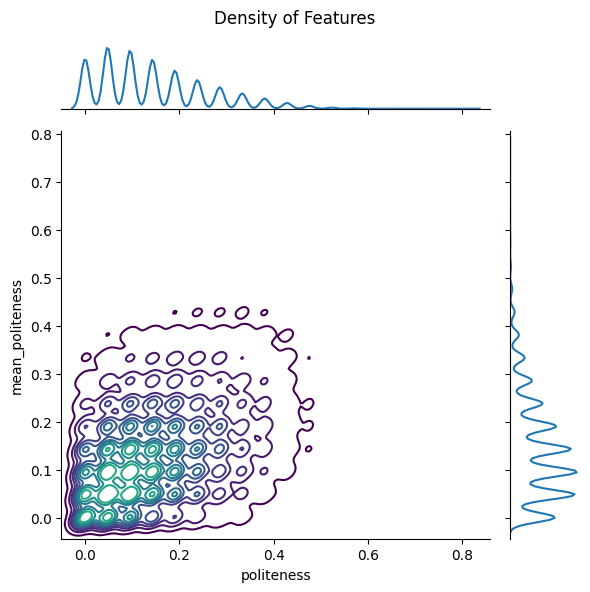

In [ ]:
density_for_numeric_to_mean_numeric(df, 'politeness', 'politeness')

Number of rows with non-NaN values in both 'mean_politeness' and 'politeness': 135904


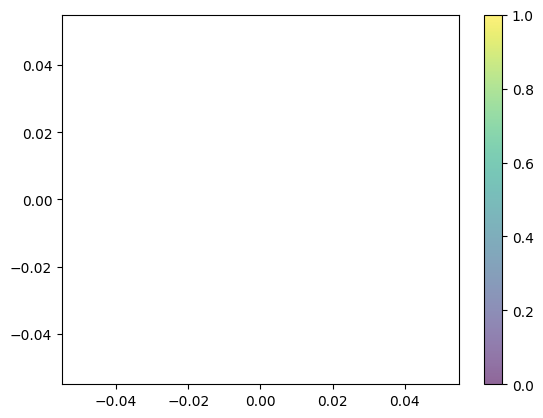

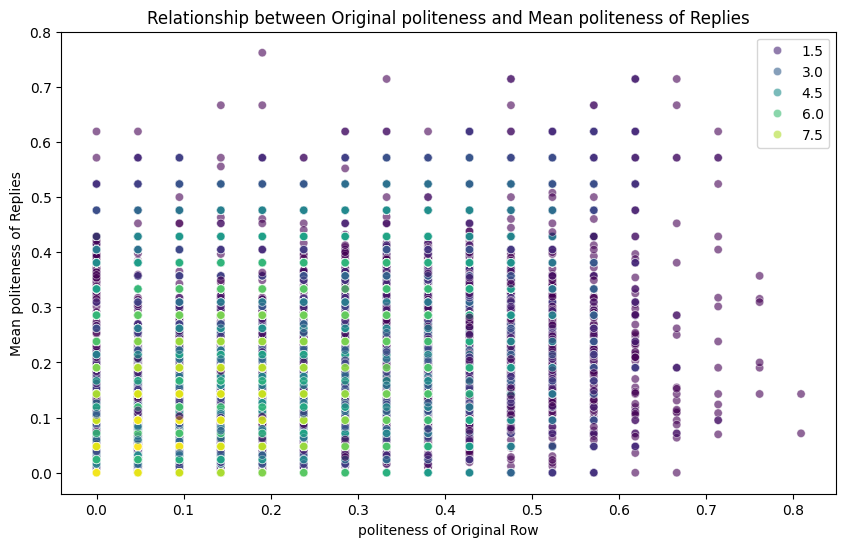

In [ ]:
density_for_numeric_to_mean_numeric_simple(df, 'politeness', 'politeness')

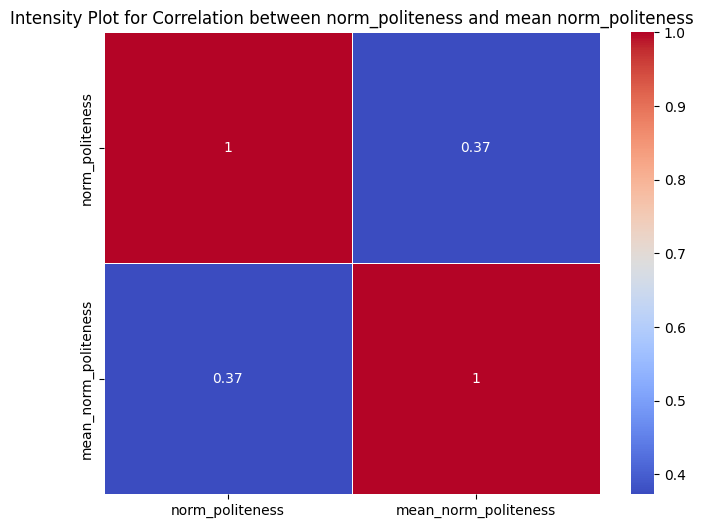

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'norm_politeness', 'norm_politeness')

Number of rows with non-NaN values in both 'mean_relatedness' and 'relatedness': 116376


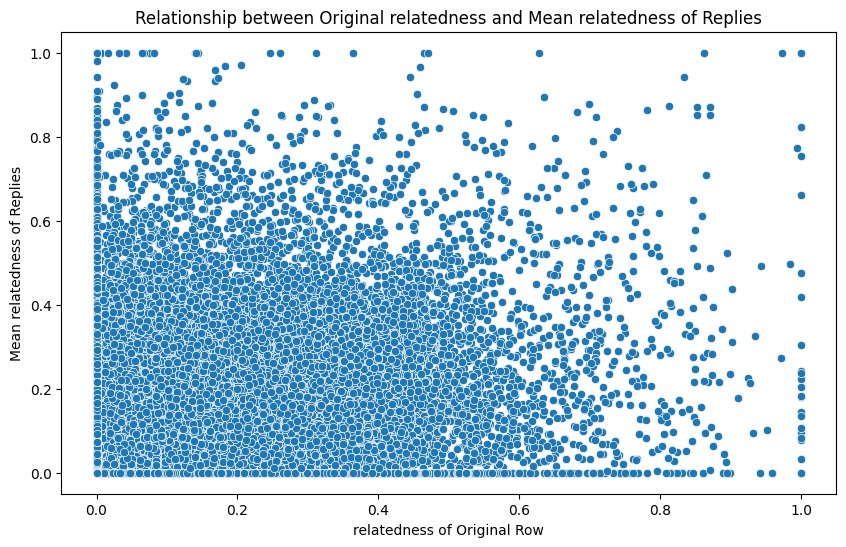

In [ ]:
scatter_for_numeric_to_mean_numeric(df, 'relatedness', 'relatedness')

246332
67074


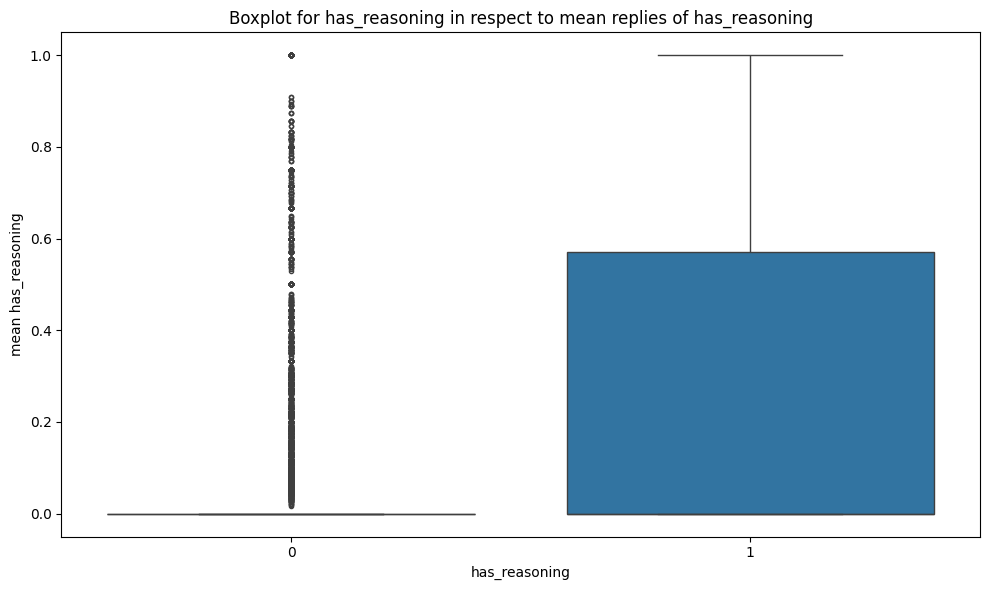

In [ ]:
boxplots_for_categorical_to_mean_numeric(df, 'has_reasoning', 'has_reasoning')


##Subjectivity to mean replies

<Figure size 800x600 with 0 Axes>

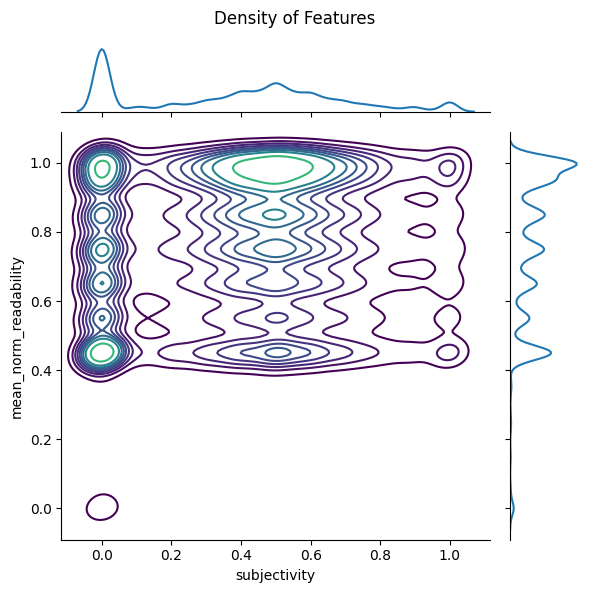

In [ ]:
density_for_numeric_to_mean_numeric(df, 'subjectivity', 'norm_readability')

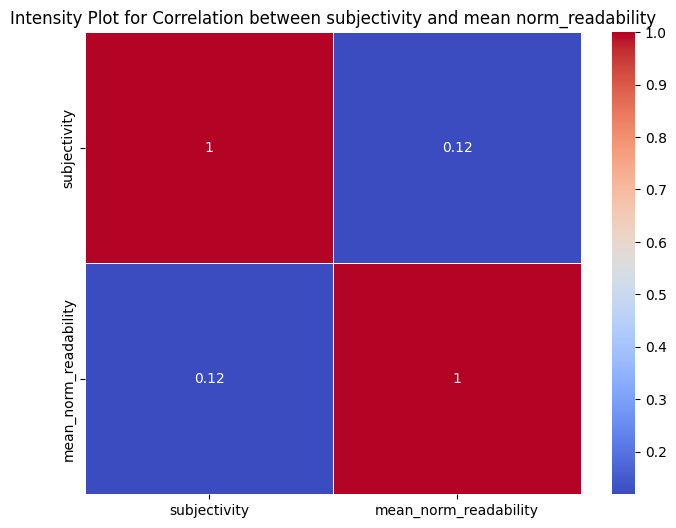

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'subjectivity', 'norm_readability')

<Figure size 800x600 with 0 Axes>

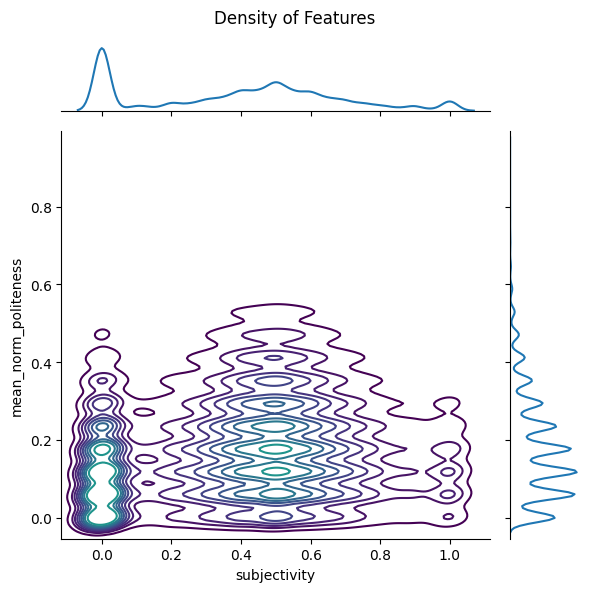

In [ ]:
density_for_numeric_to_mean_numeric(df, 'subjectivity', 'norm_politeness')

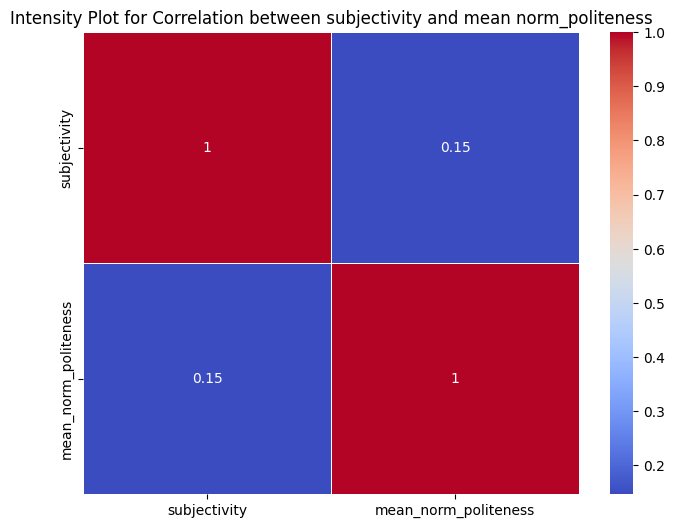

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'subjectivity', 'norm_politeness')

<Figure size 800x600 with 0 Axes>

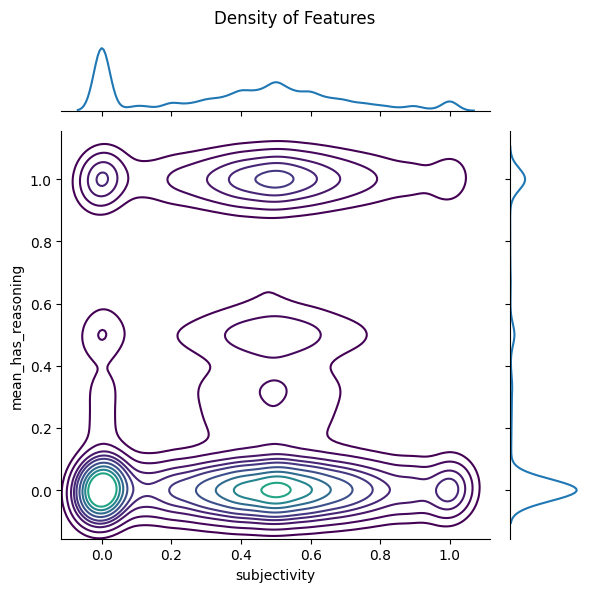

In [ ]:
density_for_numeric_to_mean_numeric(df, 'subjectivity', 'has_reasoning')

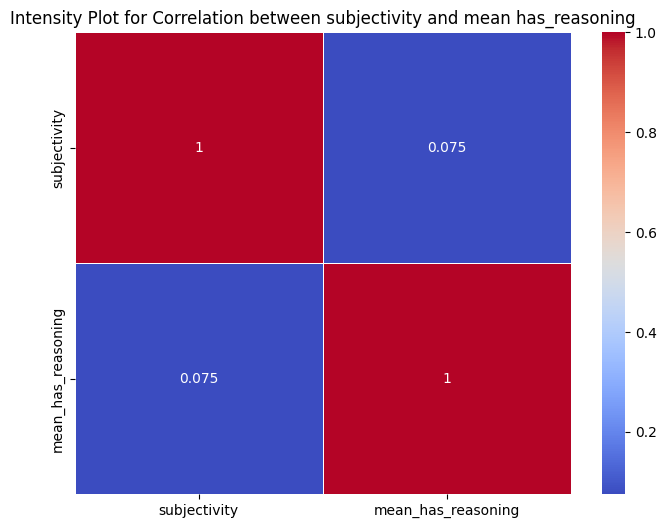

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'subjectivity', 'has_reasoning')

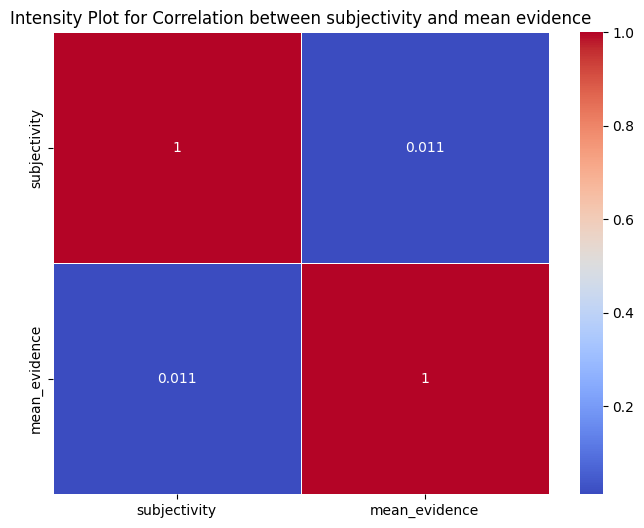

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'subjectivity', 'evidence')

<Figure size 800x600 with 0 Axes>

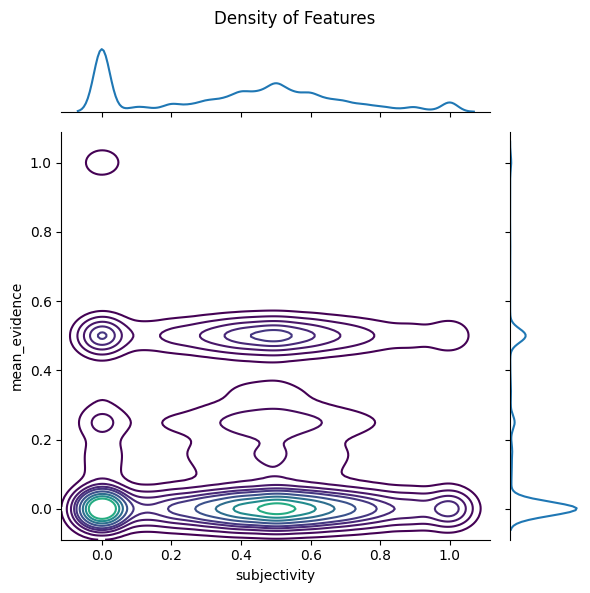

In [ ]:
density_for_numeric_to_mean_numeric(df, 'subjectivity', 'evidence')

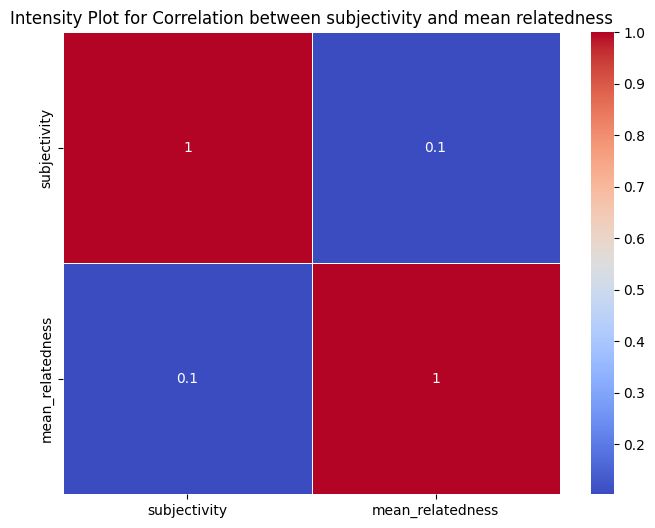

In [ ]:
heatmap_for_numeric_to_mean_numeric(df, 'subjectivity', 'relatedness')

<Figure size 800x600 with 0 Axes>

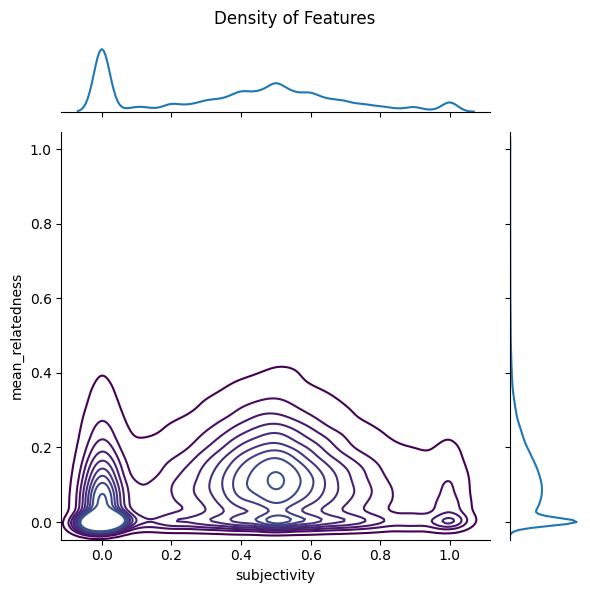

In [ ]:
density_for_numeric_to_mean_numeric(df, 'subjectivity', 'relatedness')

##Polarity to mean replies

<Figure size 800x600 with 0 Axes>

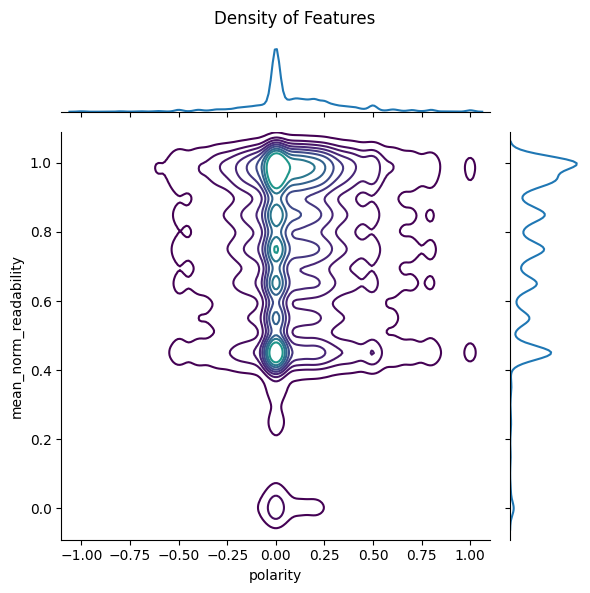

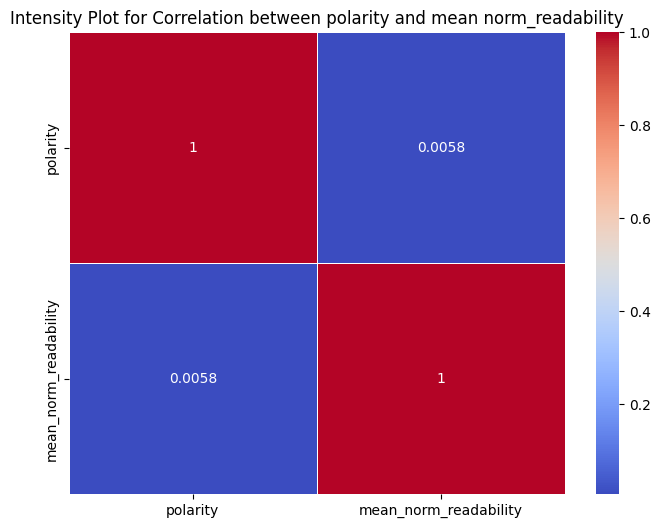

<Figure size 800x600 with 0 Axes>

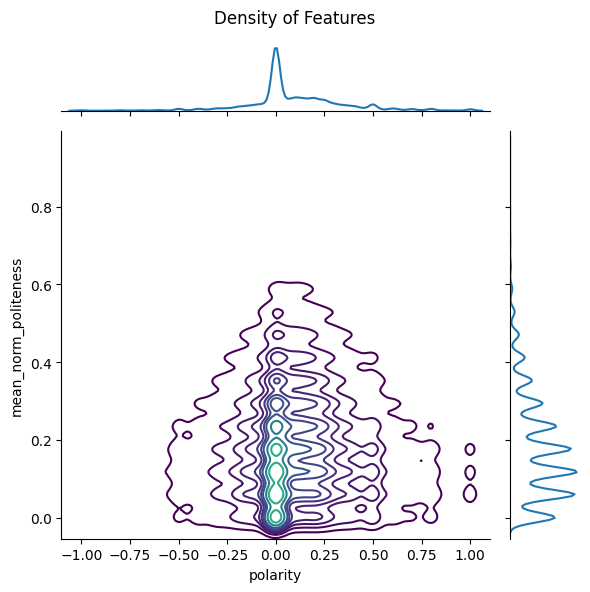

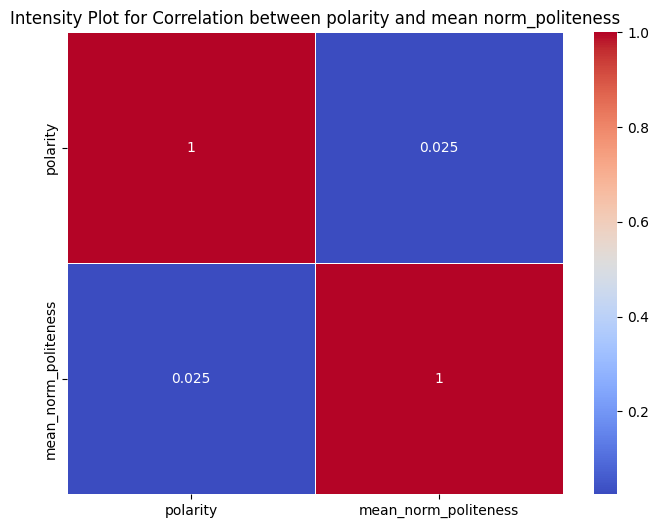

<Figure size 800x600 with 0 Axes>

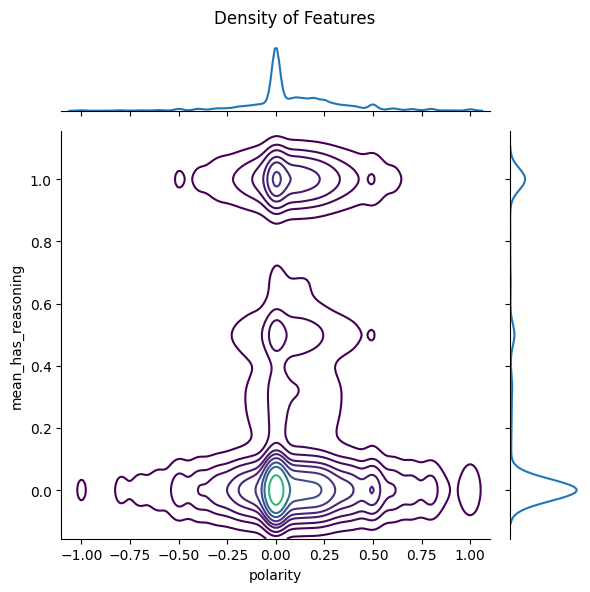

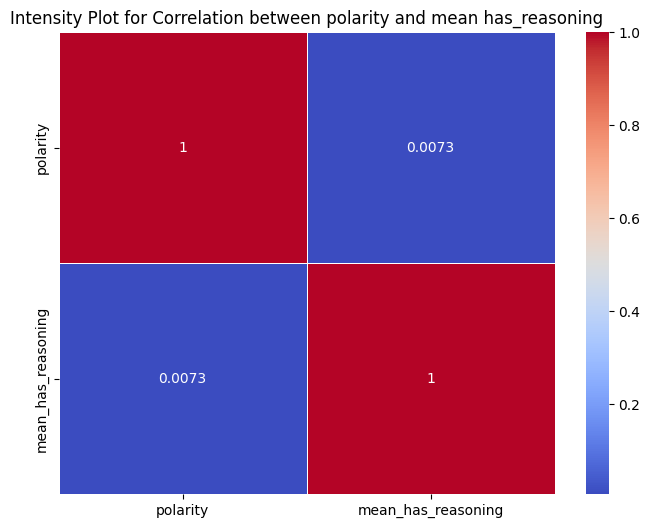

<Figure size 800x600 with 0 Axes>

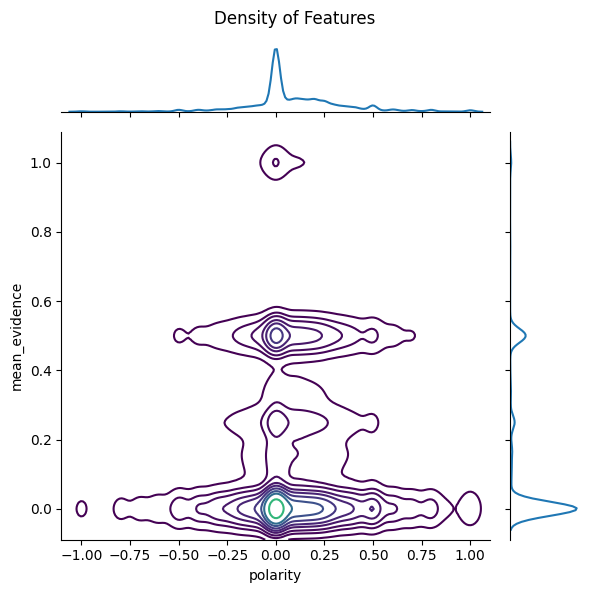

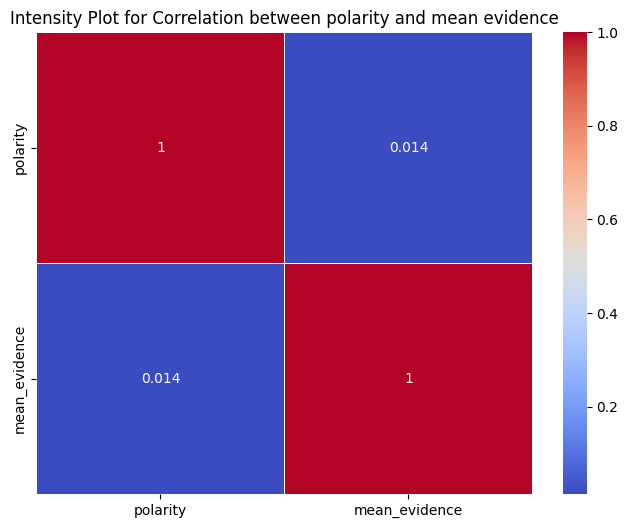

<Figure size 800x600 with 0 Axes>

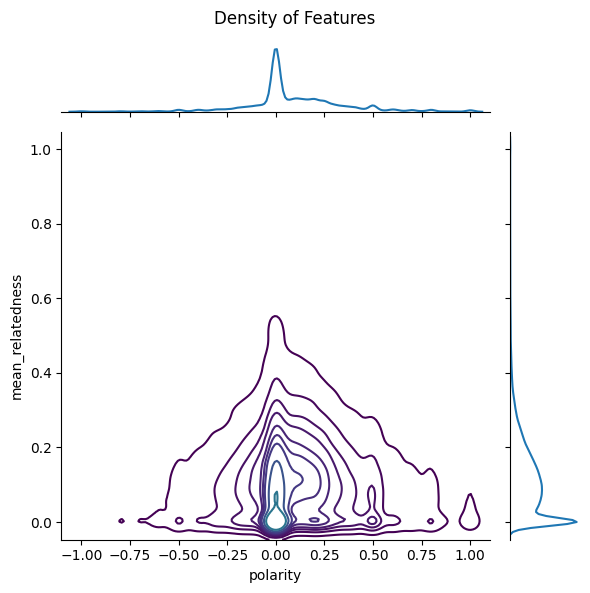

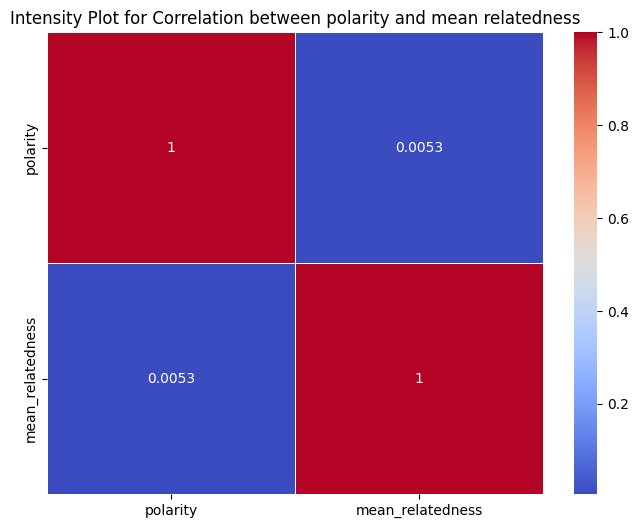

In [14]:
heatmap_and_density_for_maxims('polarity')